# Duke Phung Week 13 Assignment

### After reviewing the data dictionary, odor, gill size and spore print color will be used in determining a model to predict whether a mushroom is edible or poisonous

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
mushrooms = pd.read_csv('mushroomData.csv', usecols=['Consumable', 'Odor', 'Gill-size', 'Spore-sprint-color'])
mushrooms.rename(columns={'Odor': 'Odor_type', 'Gill-size': 'Gill_type', 'Spore-sprint-color': 'Spore_color'},
                inplace=True)

In [2]:
mushrooms.head()

,Consumable,Odor_type,Gill_type,Spore_color
0,p,p,n,k
1,e,a,b,n
2,e,l,b,n
3,p,p,n,k
4,e,n,b,n


### Consumable code has been replace by either 0 for edible or 1 for poisonous.  Data located in the gill type column, odor type column, and spore color has also been replace by numeric values.

In [3]:
# consumable code: 0 = edible, 1 = poisonous
consumable = {'e': 0, 'p': 1}
mushrooms['Consumable'].replace(consumable, inplace=True)

In [4]:
mushrooms.Odor_type.unique()

array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object)

In [5]:
# odor code: 1 = pungent, 2 = almond, 3 = anise, 4 = none, 5 = foul, 6 = creosote, 7 = fishy, 8 = spicy, 9 = musty
odor = {'p': 1, 'a': 2, 'l': 3, 'n': 4, 'f': 5, 'c': 6, 'y': 7, 's': 8, 'm': 9}
mushrooms.Odor_type.replace(odor, inplace=True)

In [6]:
# gill size code: 0 = broad, 1 = narrow
gill_type = {'b': 0, 'n': 1}
mushrooms['Gill_type'].replace(gill_type, inplace=True)

In [7]:
mushrooms['Spore_color'].unique()

array(['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b'], dtype=object)

In [8]:
# print_color: 1 = black, 2 = brown, 3 = purple, 4 = chocolate, 5 = white, 6 = green, 7 = orange, 8 = yellow, 9 = buff
print_color = {'k': 1, 'n': 2, 'u': 3, 'h': 4, 'w': 5, 'r': 6, 'o': 7, 'y': 8, 'b': 9}
mushrooms.Spore_color.replace(print_color, inplace=True)

In [9]:
#mushrooms.groupby(['Spore_color']).Consumable.sum()

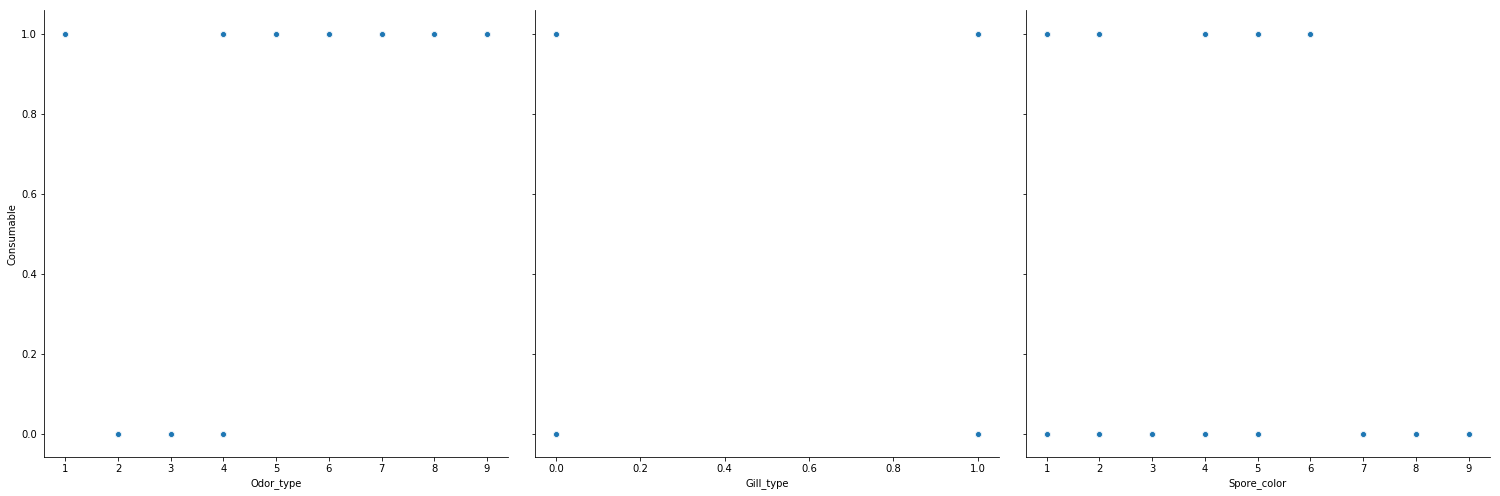

In [10]:
sns.pairplot(mushrooms, x_vars=['Odor_type', 'Gill_type', 'Spore_color'], y_vars=['Consumable'], height=7)

### According to the plots above, odor type and spore color may have a more accurate prediction of a poisonous mushroom.  In the chart to the left, odor type labelled 2 and 3 does not seem to have any poisonous mushrooms.  The chart in the right indicates thats mushrooms with spore color labelled 1, 2, 4, and 5 may indicate poisonous but spore color number 6 indicates a high probability that all mushrooms with green spore print color is poisonous.  The plot in the middle represents gill type and consumability but the because gill type 0 and 1 both represent edible and poisonous mushroom, it may not be a good predictor and will be removed from the machine learning model.